In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycorn import pc_uni6

cmap_tab = plt.get_cmap('tab10')

In [2]:
def parse_file(file):
    # from Ryan Kibler
    
    #loads the zipped files and parses the xml to collect the data. Returns a pandas dataframe
    fdata = pc_uni6(file)
    fdata.load()
    fdata.xml_parse()
    fdata.clean_up()

    #print(fdata.keys())
    #print(fdata['UV 1_280'])

    return pd.DataFrame().from_dict({key:fdata[key]['data'] for key in fdata.keys()},orient='index').transpose()

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data


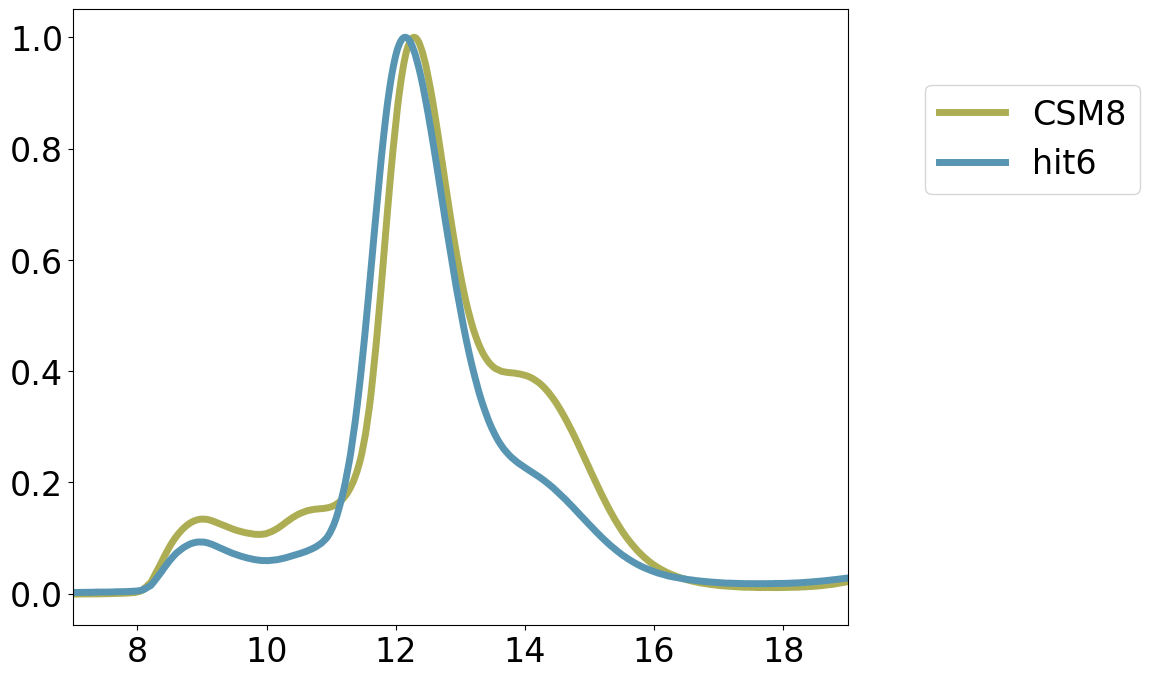

In [3]:
hit6 = parse_file('akta_traces/hit6_AIM.zip')
hit6_uv = np.array(list(hit6['UV 1_280']))

CSM8 = parse_file('akta_traces/hit6_CSM8_AIM.zip')
CSM8_uv = np.array(list(CSM8['UV 1_280']))

# L11 = parse_file('akta_traces/hit6_CSM8_L11_AIM.zip')
# L11_uv = np.array(list(L11['UV 1_280']))

plt.figure(figsize=[10,8])
# plt.plot(L11_uv[:,0],L11_uv[:,1],linewidth=5,color='#48327F',label='SMART')
plt.plot(CSM8_uv[:,0],CSM8_uv[:,1]/np.max(CSM8_uv[:,1]),linewidth=5,color='#ADAE54',label='CSM8')
plt.plot(hit6_uv[:,0],hit6_uv[:,1]/np.max(hit6_uv[:,1]),linewidth=5,color='#5795B2',label='hit6')
plt.xlim([7,19])
# plt.ylim([-10,670])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc=[1.1,0.7],fontsize=24)

plt.savefig('AIM_akta_overlay.png',dpi=300,bbox_inches='tight')

Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data
Chromatogram
{'FormatVersion': '9', 'UNICORNVersion': '7.3.0.473'}
added - orig data
added - orig data
added - orig data


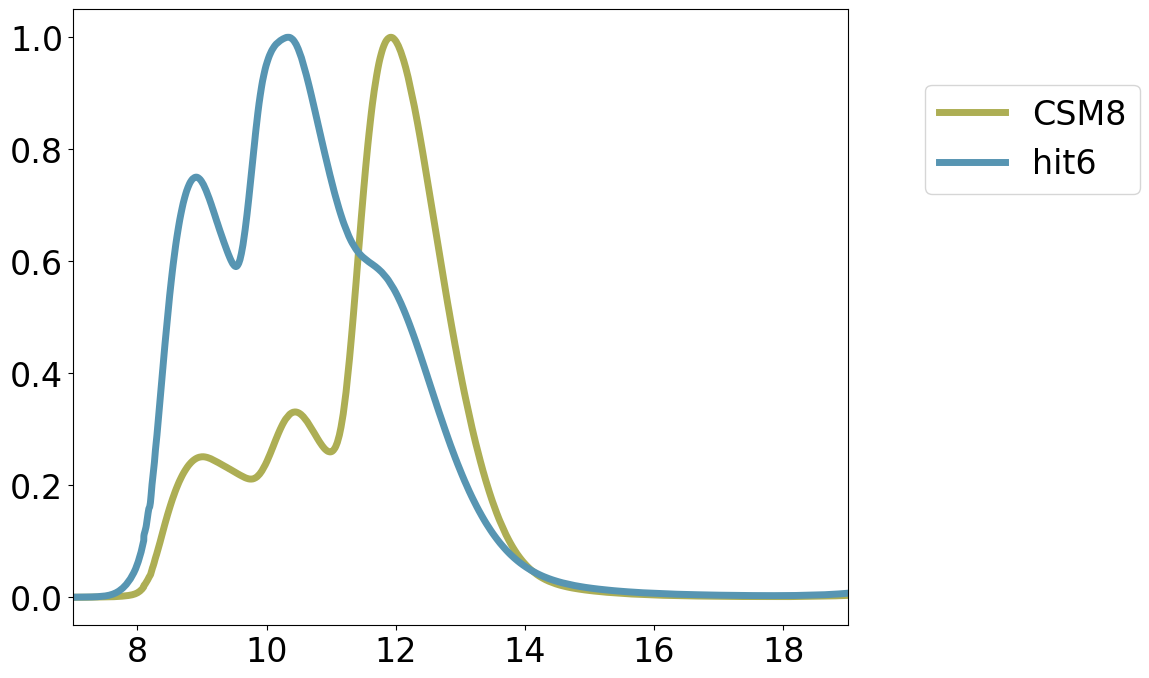

In [4]:
hit6 = parse_file('akta_traces/hit6_IPTG.zip')
hit6_uv = np.array(list(hit6['UV 1_280']))

CSM8 = parse_file('akta_traces/hit6_CSM8_IPTG.zip')
CSM8_uv = np.array(list(CSM8['UV 1_280']))

# L11 = parse_file('akta_traces/hit6_CSM8_L11_IPTG.zip')
# L11_uv = np.array(list(L11['UV 1_280']))

plt.figure(figsize=[10,8])
# plt.plot(L11_uv[:,0],L11_uv[:,1]/np.max(L11_uv[:,1]),linewidth=5,color='#48327F',label='SMART')
plt.plot(CSM8_uv[:,0],CSM8_uv[:,1]/np.max(CSM8_uv[:,1]),linewidth=5,color='#ADAE54',label='CSM8')
plt.plot(hit6_uv[:,0],hit6_uv[:,1]/np.max(hit6_uv[:,1]),linewidth=5,color='#5795B2',label='hit6')
plt.xlim([7,19])
# plt.ylim([-10,670])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc=[1.1,0.7],fontsize=24)

plt.savefig('IPTG_akta_overlay.png',dpi=300,bbox_inches='tight')

In [5]:
CFPS = pd.read_csv('20221216_CFPS_from_Laura/20221216_CFPS_from_Laura_with_hit6.csv',index_col=0)
CFPS

,Sample ID,Total Ave.(ug/mL),Total std,Soluble (ug/mL),Soluble std,Total Ave (uM),Total std.1,Soluble (uM),Soluble std.1
Sample #,,,,,,,,,
1,sfGFP,857.206906,18.424627,928.912689,54.065079,33.589612,0.721968,36.399400,2.118538
2,(-) wt single chain dimer,-5.731259,3.901712,-0.199092,2.674550,-0.131240,0.089345,-0.004559,0.061245
3,hit6_CSM8,408.116175,74.873727,328.488248,43.783012,14.606878,2.679804,11.756917,1.567037
4,hit6_CSM8_sFLAG_Nterm_12,849.466372,78.206014,819.358357,62.490145,27.580077,2.539156,26.602544,2.028901
5,hit6_CSM8_sFLAG_Cterm_6,426.618932,28.814223,420.720360,29.887887,14.364274,0.970176,14.165669,1.006326
6,hit6_CSM8_sFLAG_Cterm_8,147.398258,14.505879,123.481510,4.445691,4.962904,0.488413,4.157627,0.149687
7,hit6_CSM8_sFLAG_Cterm_10,295.364819,35.245217,25.862040,4.787427,9.799762,1.169383,0.858064,0.158840
8,hit6_CSM8_sFLAG_Cterm_14,463.622257,16.759243,464.234241,32.579262,15.270825,0.552017,15.290983,1.073098
9,hit6_CSM8_sFLAG_Cterm_16,489.367810,63.268154,568.597075,94.028074,16.002871,2.068939,20.053347,2.475207


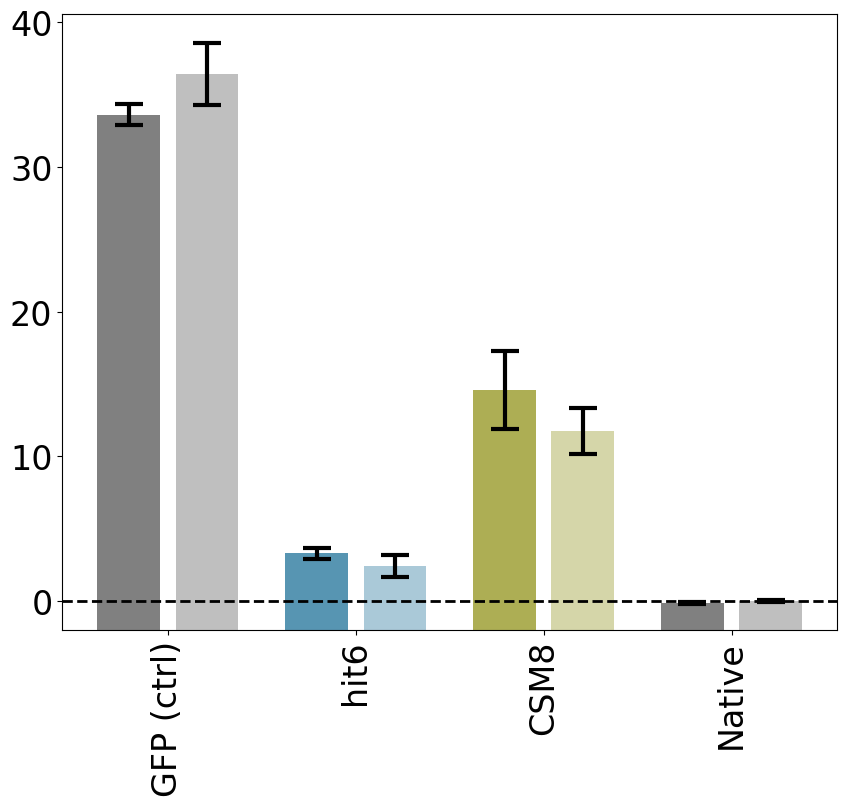

In [6]:
names = {
    'sfGFP':'GFP (ctrl)',
    '(-) wt single chain dimer':'Native',
    'hit6':'hit6',
    'hit6_CSM8':'CSM8',
    # 'CSM8_normal_11_NT':'SMART'
}

colors = ['gray','#5795B2','#ADAE54','gray']

plt.figure(figsize=[10,8])
ticks = []
tick_locs = []
for i,design in enumerate([1,13,3,2]):
    
    plt.bar(2.4*i + 1,CFPS.loc[design,'Soluble (uM)']+2,bottom=-2,color=colors[i],alpha=0.5,
            yerr=CFPS.loc[design,'Soluble std.1'],capsize=10,error_kw={'elinewidth':3,'capthick':3})
    
    plt.bar(2.4*i,CFPS.loc[design,'Total Ave (uM)']+2,bottom=-2,color=colors[i],
            yerr=CFPS.loc[design,'Total std.1'],capsize=10,error_kw={'elinewidth':3,'capthick':3})
    
    ticks.append(names[CFPS.loc[design,'Sample ID']])
    tick_locs.append(2.4*i + 0.5)
    
plt.xticks(tick_locs,ticks,rotation=90,fontsize=24)
plt.yticks([0,10,20,30,40],fontsize=24)
xlim = plt.xlim()
plt.plot(xlim,[0,0],'k--',linewidth=2)
plt.xlim(xlim)
plt.savefig('CFPS.png',dpi=300,bbox_inches='tight')